# SAM Example

In [ ]:
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.5.1+cu124
Torchvision version: 0.20.1+cu124
CUDA is available: True


In [2]:
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

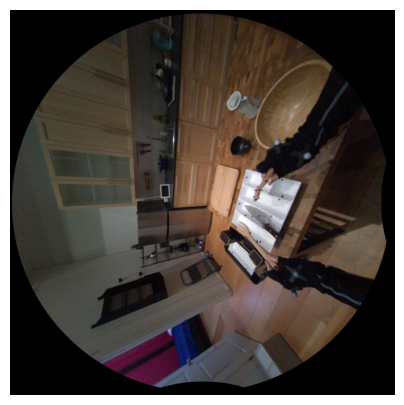

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
import os
import requests


# Download the model weights if not already present
if not os.path.exists('sam_vit_h_4b8939.pth'):
    print("Downloading model weights sam_vit_h_4b8939.pth...")
    url = 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'
    response = requests.get(url)
    with open('model.pth', 'wb') as f:
        f.write(response.content)
else:
    print("Model weights sam_vit_h_4b8939.pth already downloaded.")

Model weights sam_vit_h_4b8939.pth already downloaded.


In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

# Assumes you have a GPU available
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device="cuda")

mask_generator = SamAutomaticMaskGenerator(sam)

/home/ubuntu/egolifter/.venv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [19]:
masks = mask_generator.generate(image)

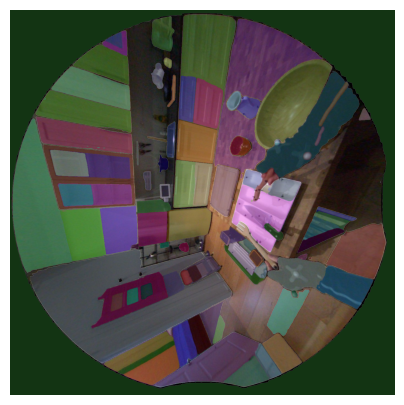

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
# Try the smaller model

model_file_sam_vit_b = "sam_vit_b_01ec64.pth"
if not os.path.exists(model_file_sam_vit_b):
    print(f"Downloading model weights {model_file_sam_vit_b}...")
    url = f'https://dl.fbaipublicfiles.com/segment_anything/{model_file_sam_vit_b}'
    response = requests.get(url)
    with open(model_file_sam_vit_b, 'wb') as f:
        f.write(response.content)
else:
    print(f"Model weights {model_file_sam_vit_b} already downloaded.")

https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


In [27]:
import cv2
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

sam = sam_model_registry["vit_b"](checkpoint=model_file_sam_vit_b).to(device="cuda")
mask_generator = SamAutomaticMaskGenerator(sam)
# img = cv2.imread("test.jpg")[:,:,::-1]
# masks = mask_generator.generate(img)

/home/ubuntu/egolifter/.venv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
masks = mask_generator.generate(image)

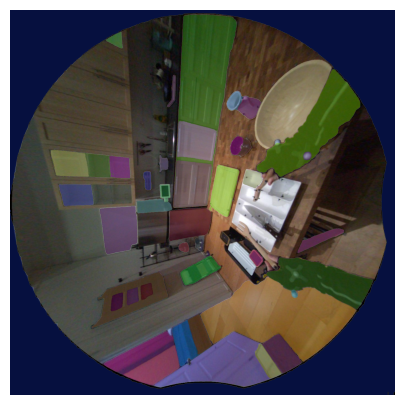

In [35]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()